In [1]:
# Loading libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

%matplotlib inline

In [2]:
new_data = pd.read_csv('Downloads/data_updated.csv', index_col=0)
new_data.shape

(456, 10)

In [3]:
new_data['Class'].value_counts()

0    444
1     12
Name: Class, dtype: int64

The problem we are trying to solve in this analysis is breast cancer prediction. Based on the features available, we are going to predict whether the tumor a patient has is benign or malignant. One of the biggest challenges of this analysis is to deal with an imbalanced dataset

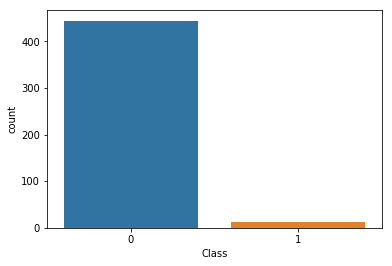

In [4]:
sns.countplot(new_data['Class'])

In [5]:
new_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


/Users/anushabimal/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


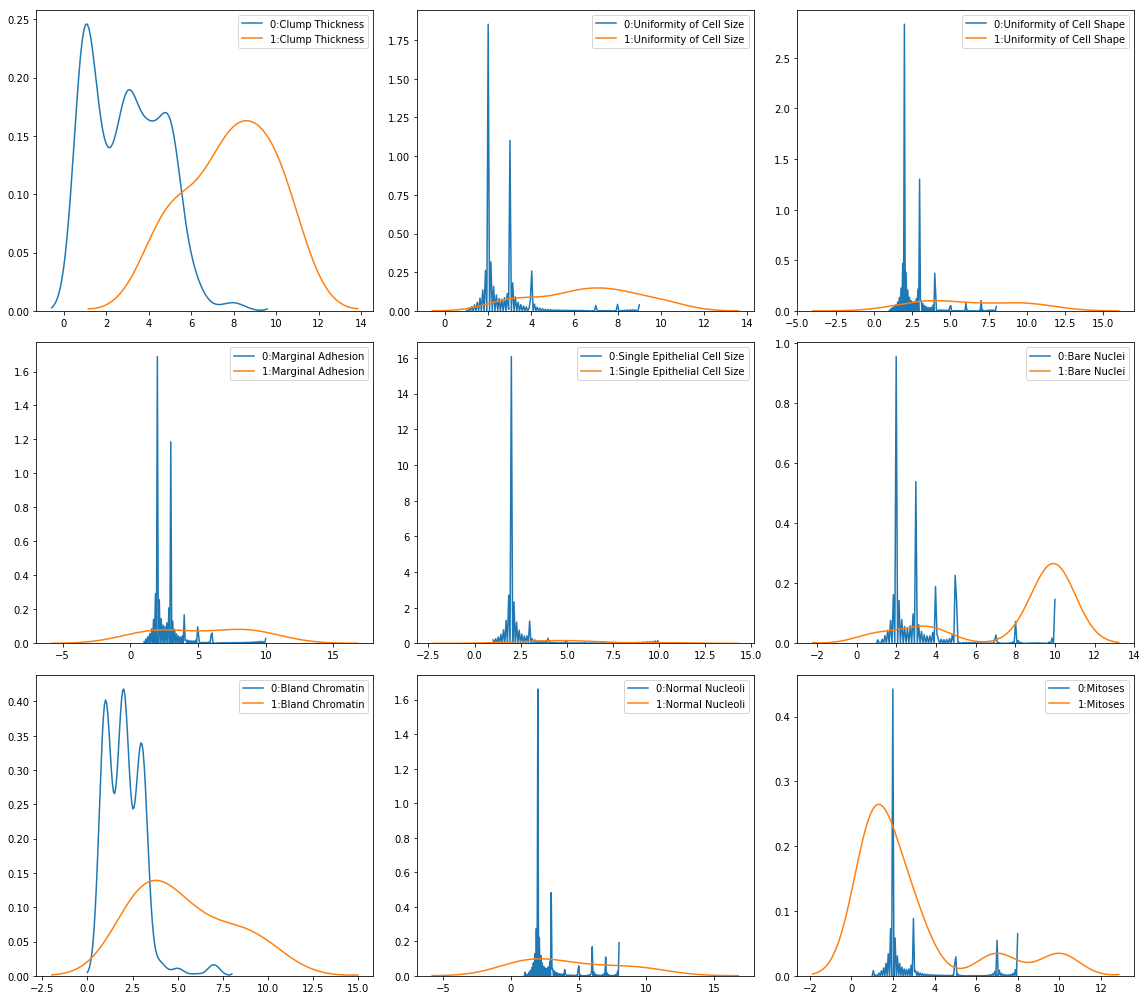

In [6]:
ccols = new_data.columns

grouped_data = new_data.groupby('Class')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), ccols):
    for k, v in grouped_data[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)

Distribution of each feature for malignant and benign tumor

In [7]:
def metrics(true, preds):
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds)
    precision = precision_score(true, preds)
    
    print 'accuracy: {}, recall: {}, precision: {}'.format(accuracy, recall, precision)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(new_data.drop('Class', axis=1), new_data['Class'], test_size = 0.30, random_state=84)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
preds = rf.predict(x_test)
metrics(y_test, preds)

accuracy: 0.992700729927, recall: 0.5, precision: 1.0


In [15]:
y_train = y_train.reshape(-1)
x = x_train.copy()
y = y_train.copy()
y_train_malignant_indices = np.where(y == 1)[0]
sample_indices = np.random.choice(y_train_malignant_indices, 300, replace=True)

/Users/anushabimal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [16]:
oversampled_data = x.iloc[sample_indices]
oversampled_data.shape
x = pd.concat([x_train, oversampled_data])
print x.shape
y_train_sampled = y[sample_indices]
y = np.append(y, y_train_sampled, axis=0)
print y.shape

(619, 9)
(619,)


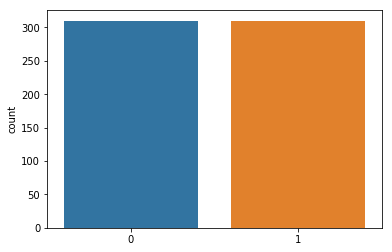

In [17]:
sns.countplot(y)

In [18]:
rf = RandomForestClassifier()

In [19]:
scores = cross_val_score(rf, x, y, scoring='recall', cv=5)
print scores

[ 1.  1.  1.  1.  1.]


In [20]:
preds = cross_val_predict(rf, x, y, cv=5)
print recall_score(y, preds)
print accuracy_score(y, preds)
print precision_score(y, preds)

1.0
0.993537964459
0.987261146497


In [21]:
rf.fit(x, y)
test_preds = rf.predict(x_test)
print recall_score(y_test, test_preds)
print accuracy_score(y_test, test_preds)
print precision_score(y_test, test_preds)

0.5
0.970802919708
0.25


In [22]:
kf = KFold(n_splits=5)
kf.get_n_splits(x_train)
KFold(n_splits=5, random_state=42, shuffle=True)

KFold(n_splits=5, random_state=42, shuffle=True)

In [23]:
cross_val_recall_score_lst = []
for train_index, test_index in kf.split(x_train):
    train, test = x_train.iloc[train_index], x_train.iloc[test_index]
    target_train, target_test = y_train[train_index], y_train[test_index]
    print target_train.sum(), target_test.sum()
    target_train_malignant_indices = np.where(target_train == 1)[0]
    sample_indices = np.random.choice(target_train_malignant_indices, 200, replace=True)
    oversampled_data = train.iloc[sample_indices]
    oversampled_data.shape
    train = pd.concat([train, oversampled_data])
    target_train_sampled = target_train[sample_indices]
    target_train = np.append(target_train, target_train_sampled, axis=0)
    rf = RandomForestClassifier()
    rf.fit(train, target_train)
    test_preds = rf.predict(test)
    print recall_score(target_test, test_preds)
    print accuracy_score(target_test, test_preds)
    print precision_score(target_test, test_preds)
    cross_val_recall_score_lst.append(recall_score(target_test, test_preds))
    print '-------------------------------------------------------------------------------'

8 2
0.5
0.953125
0.333333333333
-------------------------------------------------------------------------------
7 3
1.0
0.96875
0.6
-------------------------------------------------------------------------------
8 2
0.5
0.984375
1.0
-------------------------------------------------------------------------------
9 1
0.0
0.984375
0.0
-------------------------------------------------------------------------------
8 2
1.0
1.0
1.0
-------------------------------------------------------------------------------


In [24]:
print np.mean(cross_val_recall_score_lst)

0.6
